In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
wind_speed = 10.
CT = 0.793
ks = 0.0324555
diameter = 80.
beta = 0.5*(1 + math.sqrt(1 - CT))/math.sqrt(1 - CT)
epsilon = 0.2*math.sqrt(beta)

In [5]:
def ct2a_1dmomentum(ct):
    return 0.5 * (1 - math.sqrt(1 - min(1,ct)))

def ct2a_madsen(ct):
    k1 = 0.2460
    k2 = 0.0586
    k3 = 0.0883
    return ct * (k1 + ct * (k2 + ct * k3))

In [6]:
def calc_sigma(k, x, eps):
    return k * x + eps

In [7]:
def calc_center_deficit_ratio(k, x, eps, ct, ct2a):
    sigma = calc_sigma(k, x, eps)
    return sigma, min(1, 2 * ct2a(ct / (8 * sigma**2)))

In [8]:
imax, jmax = 1001, 501

In [9]:
x = np.linspace(- 3 * diameter, 7 * diameter, imax)
y = np.linspace(- 2.5 * diameter, 2.5 * diameter, jmax)
X, Y = np.meshgrid(x, y)
deficit = np.zeros((imax, jmax))

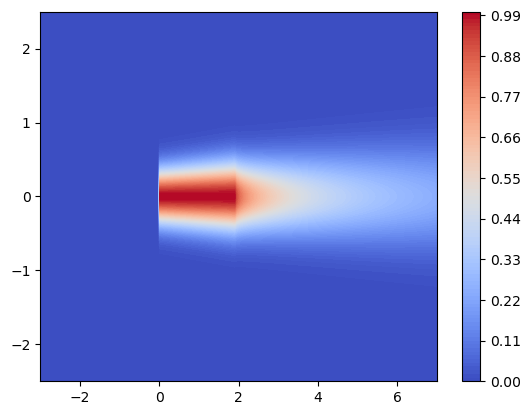

In [10]:
for i in range(imax):
    for j in range(jmax):
        if x[i] >= 0:
            sigma, center_deficit_ratio = calc_center_deficit_ratio(
                ks,
                x[i] / diameter,
                epsilon,
                CT,
                ct2a_1dmomentum
            )
            deficit[i, j] = wind_speed * center_deficit_ratio * math.exp(
                - (y[j] / diameter)**2 / (2 * sigma**2)
            )

plt.contourf(X/diameter, Y/diameter, deficit.T/wind_speed, levels=np.linspace(0, 1, 101), cmap='coolwarm')
plt.colorbar()

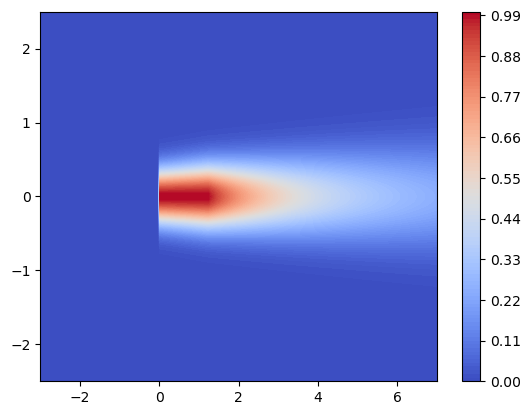

In [11]:
for i in range(imax):
    for j in range(jmax):
        if x[i] >= 0:
            sigma, center_deficit_ratio = calc_center_deficit_ratio(
                ks,
                x[i] / diameter,
                epsilon,
                CT,
                ct2a_madsen
            )
            deficit[i, j] = wind_speed * center_deficit_ratio * math.exp(
                - (y[j] / diameter)**2 / (2 * sigma**2)
            )

plt.contourf(X/diameter, Y/diameter, deficit.T/wind_speed, levels=np.linspace(0, 1, 101), cmap='coolwarm')
plt.colorbar()